#USE THE REGEX TO REMOVE STOPWORDS

In [80]:
import nltk
import csv
from nltk.corpus import stopwords
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
import numpy as np
%matplotlib inline

In [81]:
df = pd.read_csv('cl3.csv')

In [82]:
df.head(20) 

,text,rating
0,"Beautiful film, but so preachyLoveofLegacy21 J...",6
1,Clever and fun beginning turns into another le...,6
2,It was depressingcoxaneesa24 July 2023Warning:...,8
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9
4,reasons FOR seeing it and 1 reason AGAINST.im...,7
5,Barbie Is A Weirdly Fun Movie!HabibieHakim1231...,8
6,Too heavy handedNatcat8722 July 2023Warning: S...,6
7,Fun and surprisingly touchingjpismyname19 July...,8
8,"High Highs, Low Lows.Lk199024 July 2023The fir...",6
9,Well this really did come as a surprise.Sleepi...,8


In [83]:
df.isnull().sum()

text      0
rating    0
dtype: int64

In [84]:
df.describe()

,text,rating
count,797,797
unique,797,16
top,"Beautiful film, but so preachyLoveofLegacy21 J...",1
freq,1,264


In [85]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'to', 'over', 'itself', 'own', "you're", 'her', 'not', 'your', "don't", 'him', 'all', 'above', 'that', 'can', 'yourselves', "wasn't", 'through', 'be', 'now', 'you', 'off', 'herself', 'at', "mightn't", 'up', 'how', 'its', 'his', 'same', 'o', 'there', 'hers', 'them', "mustn't", 'needn', "you'll", 'a', 'hasn', 'their', 'with', "isn't", 'if', 'where', 'ma', 'yours', 'was', 'this', 'such', "shan't", 'when', 'themselves', 'any', 't', 'most', "you've", 'too', "should've", 'being', 'are', 'then', 'each', 'our', 'they', 'here', 'y', 'what', "couldn't", 'during', "hasn't", 'further', 'these', "doesn't", 'doing', 'which', 'from', 'of', 'll', 'between', 'don', 'yourself', 'my', 'd', 'once', "didn't", "aren't", 'only', 'ain', 'again', 'does', 'about', 'nor', 'isn', 'is', 'had', "you'd", 'in', 'we', 'down', "shouldn't", 'than', 'very', 'been', 're', 'an', 'i', 's', 'the', 'shan', 'weren', "needn't", "that'll", 'why', "won't", "weren't", 'should', "haven't", 'and', 'until', 'before', 'shouldn', 'as'

[nltk_data] Downloading package stopwords to /Users/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

1. USE REGEX AND REMOVE STOPWORDS

In [87]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    text = re.sub(r'[!\'.,]','',text)
    
    return text

In [88]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

3.CREATE PIPLELINE REMOVE STOPWORDS AND WORD FREQ ANALYSIS AND WORD CLOUDS

In [89]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [90]:
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
movie,1899
barbie,1718
helpful,1595
film,940
found,839
review,826
vote,801
july,799
sign,798


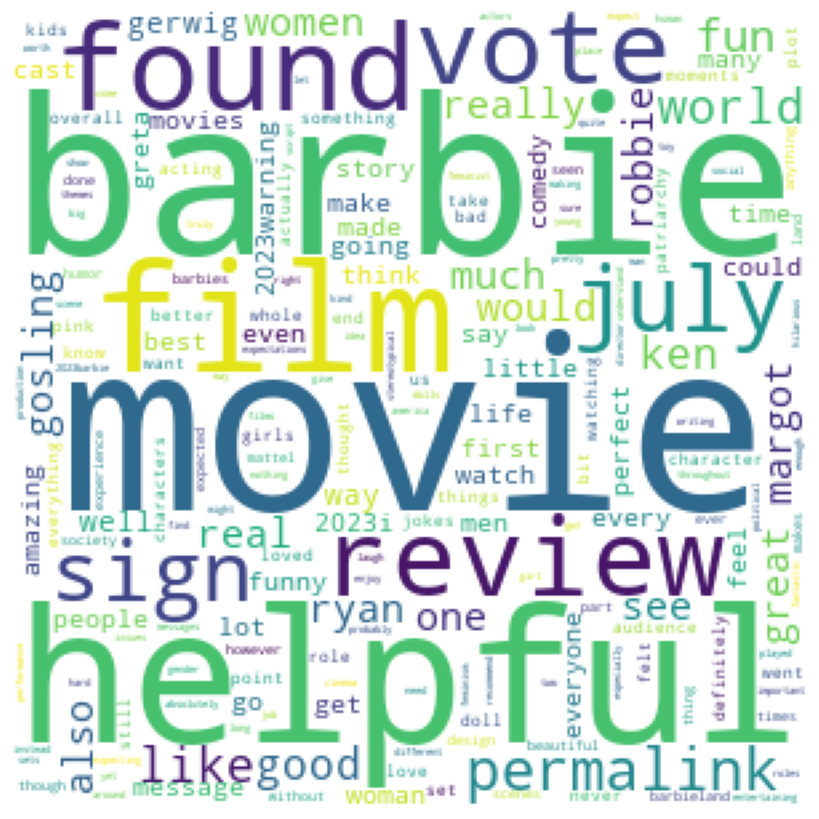

In [91]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [92]:
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    df[column].map(update)# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

WORD FREQENCY

In [93]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
movie,1899,943.272263
barbie,1718,1028.686468
helpful,1595,159.500000
film,940,1044.315330
found,839,83.900000


USE MATPLOT

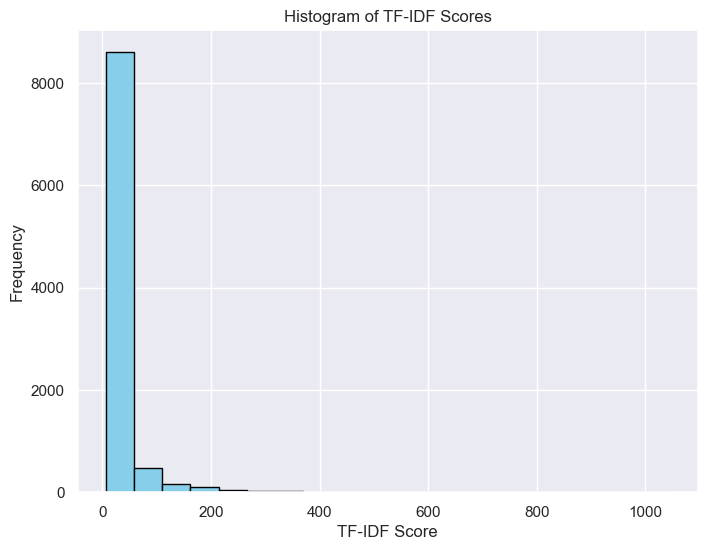

In [94]:
# Assuming freq_df is your DataFrame with columns 'word', 'freq', and 'tfidf'
# Plotting a histogram for the 'tfidf' column
plt.figure(figsize=(8, 6))
plt.hist(freq_df['tfidf'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

USING SNS

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


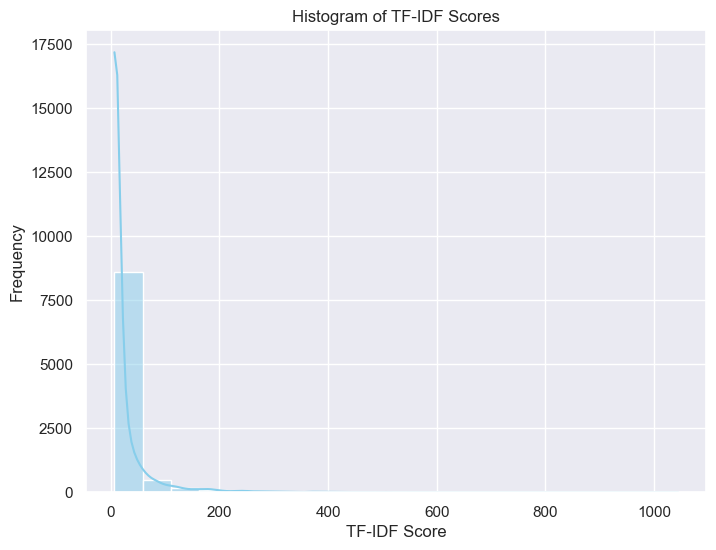

In [95]:
# Assuming freq_df is your DataFrame with columns 'word', 'freq', and 'tfidf'
# Plotting a histogram for the 'tfidf' column
plt.figure(figsize=(8, 6))
sns.histplot(freq_df['tfidf'], bins=20, color='skyblue', kde=True)
plt.title('Histogram of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [102]:
df['length']=df['text'].str.len()
df.describe()

,num_tokens,length
count,797.000000,797.000000
mean,93.361355,1046.357591
std,95.569333,1074.489006
min,11.000000,126.000000
25%,57.000000,707.000000
50%,73.000000,810.000000
75%,106.000000,1186.000000
max,867.000000,9986.000000


<Axes: ylabel='Frequency'>

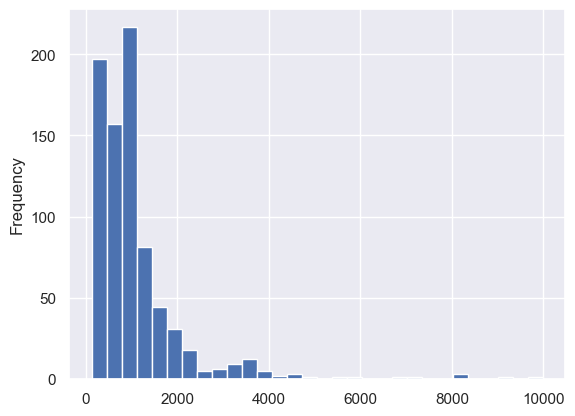

In [103]:
df['length'].plot(kind='hist', bins=30)

<Axes: >

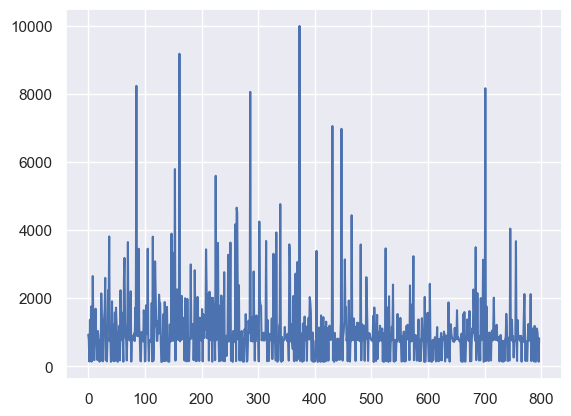

In [104]:
df['length'].plot()

<Axes: >

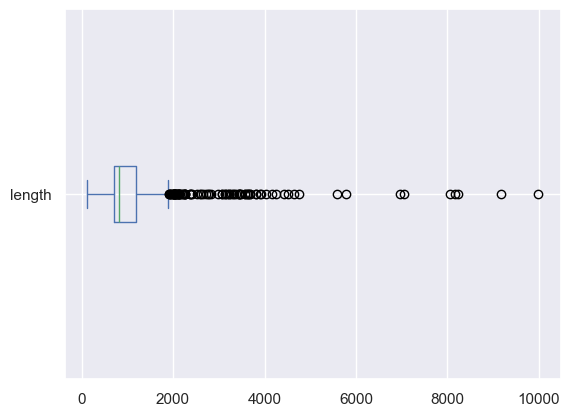

In [105]:
df['length'].plot(kind='box', vert=False)

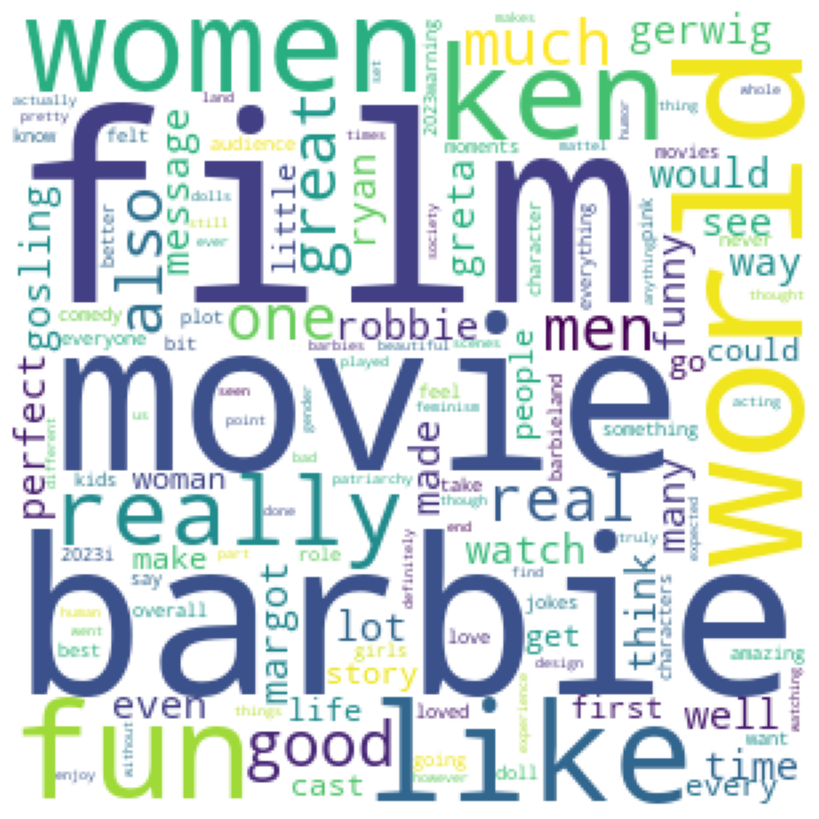

In [96]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [97]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [98]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

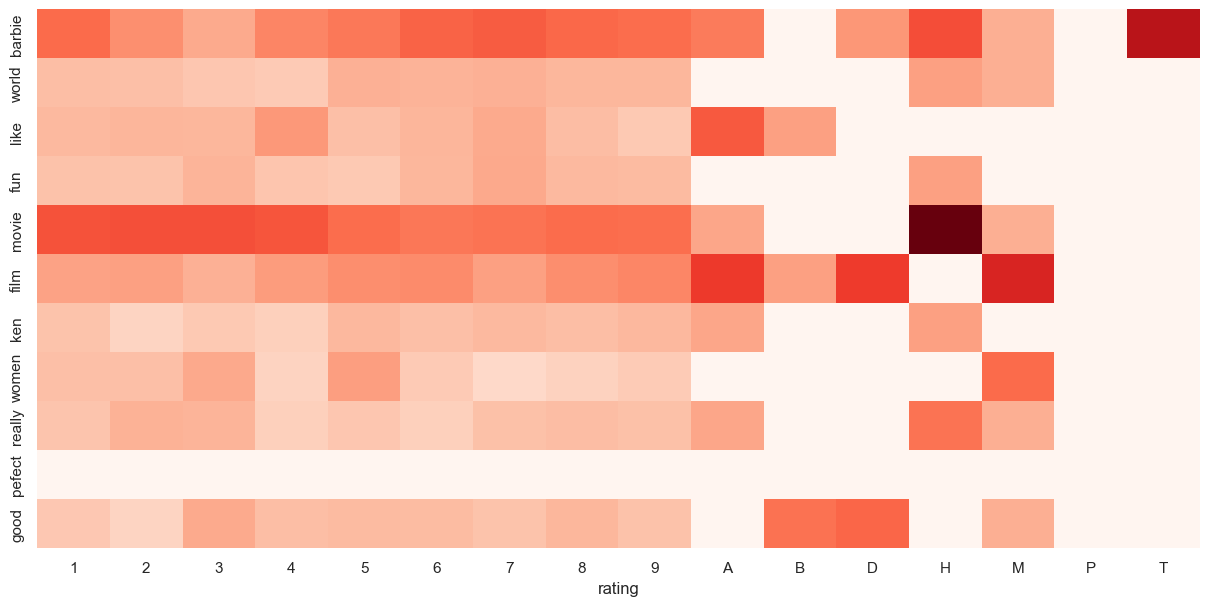

In [99]:
keywords = ['barbie','world','like','fun','movie','film','ken','women','really','pefect','good']
freq_df = count_keywords_by(df, by='rating', keywords=keywords)
freq_df = freq_df.div(df.groupby('rating')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)
# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

5.SENTIMENTAL ANALYSIS 

In [106]:
from textblob import TextBlob

In [108]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

#Now display data
df.head()

,text,rating,tokens,num_tokens,length,Subjectivity,Polarity
0,"Beautiful film, but so preachyLoveofLegacy21 J...",6,"[beautiful, film, preachyloveoflegacy21, july,...",78,929,0.488439,0.138651
1,Clever and fun beginning turns into another le...,6,"[clever, fun, beginning, turns, another, lectu...",73,777,0.454762,0.232738
2,It was depressingcoxaneesa24 July 2023Warning:...,8,"[depressingcoxaneesa24, july, 2023warning, spo...",11,140,0.000000,0.000000
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9,"[technicolor, dreamheatherhilgers24, july, 202...",119,1361,0.498204,0.051824
4,reasons FOR seeing it and 1 reason AGAINST.im...,7,"[reasons, seeing, reason, imseeg22, july, 2023...",14,164,0.000000,0.000000


In [109]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50) 

,text,rating,tokens,num_tokens,length,Subjectivity,Polarity,Insight
0,"Beautiful film, but so preachyLoveofLegacy21 J...",6,"[beautiful, film, preachyloveoflegacy21, july,...",78,929,0.488439,0.138651,Positive
1,Clever and fun beginning turns into another le...,6,"[clever, fun, beginning, turns, another, lectu...",73,777,0.454762,0.232738,Positive
2,It was depressingcoxaneesa24 July 2023Warning:...,8,"[depressingcoxaneesa24, july, 2023warning, spo...",11,140,0.000000,0.000000,Neutral
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9,"[technicolor, dreamheatherhilgers24, july, 202...",119,1361,0.498204,0.051824,Positive
4,reasons FOR seeing it and 1 reason AGAINST.im...,7,"[reasons, seeing, reason, imseeg22, july, 2023...",14,164,0.000000,0.000000,Neutral
5,Barbie Is A Weirdly Fun Movie!HabibieHakim1231...,8,"[barbie, weirdly, fun, movie, habibiehakim1231...",164,1754,0.596462,0.319868,Positive
6,Too heavy handedNatcat8722 July 2023Warning: S...,6,"[heavy, handednatcat8722, july, 2023warning, s...",12,138,0.500000,-0.200000,Negative
7,Fun and surprisingly touchingjpismyname19 July...,8,"[fun, surprisingly, touchingjpismyname19, july...",96,960,0.548932,0.471703,Positive
8,"High Highs, Low Lows.Lk199024 July 2023The fir...",6,"[high, highs, low, lows, lk199024, july, 2023t...",240,2648,0.494912,0.193439,Positive
9,Well this really did come as a surprise.Sleepi...,8,"[well, really, come, surprise, sleepin_dragon2...",110,1173,0.553241,0.285938,Positive


In [110]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

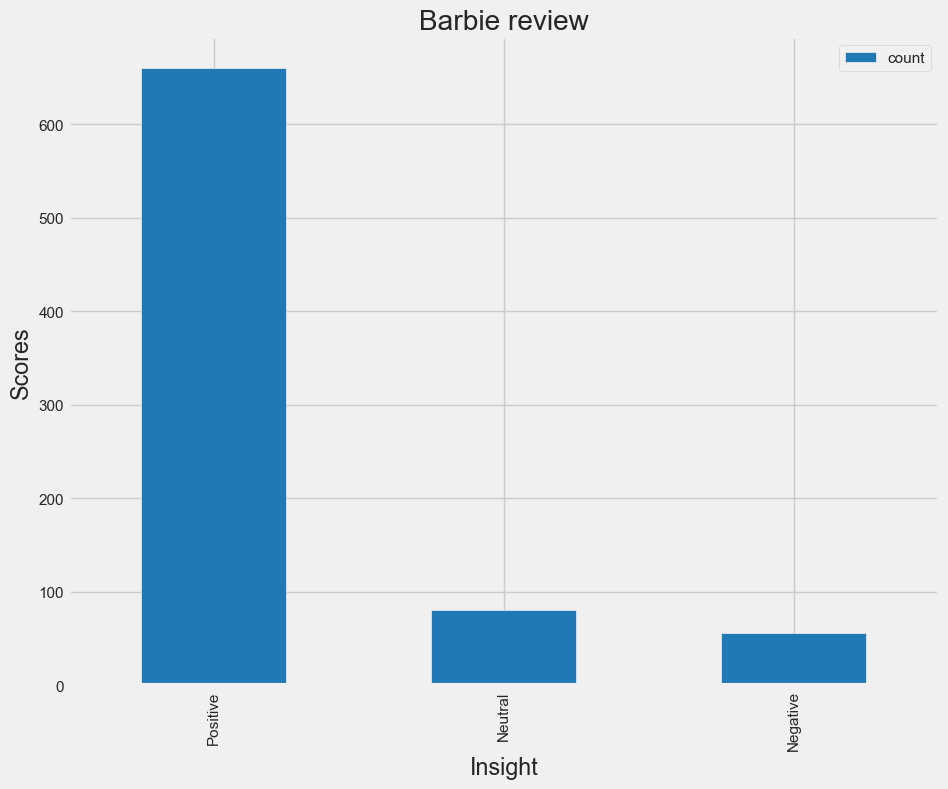

In [114]:
plt.title("Barbie review")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.legend()
plt.show()


4.PICKING 5 RANDOM STRINGS FROM REAL LIFE AND WRITING REGEX TO IDENTIFY THEM AND SORT WITH EXAMPLE

REGEX TO FIND INDIAN PHONE NUMBERS

In [3]:
import re

# Sample text
text = "My phone number is 8801839407. Please call me at 9492027609."

# Regular expression pattern to find Indian 10-digit phone numbers
pattern = r'\b\d{10}\b'

# Find all Indian 10-digit phone numbers in the text
phone_numbers = re.findall(pattern, text)

print("Indian 10-digit phone numbers found:", phone_numbers)

Indian 10-digit phone numbers found: ['8801839407', '9492027609']


regex to find emails ending with .edu

In [5]:
# Sample text
text = "My email is pete.prince@example.edu. Please contact me at prince.pete@university.edu."

# Regular expression pattern to find emails ending with ".edu"
pattern = r'\b[\w\.-]+@[\w\.-]+\.edu\b'

# Find all emails ending with ".edu" in the text
edu_emails = re.findall(pattern, text)

print("Emails ending with '.edu':", edu_emails)

Emails ending with '.edu': ['pete.prince@example.edu', 'prince.pete@university.edu']


regex to find 5 letter words

In [9]:
# Sample text
text = "This is a sample text with some 5-letter words like hello, whats , mango."

# Regular expression pattern to find 5-letter words
pattern = r'\b\w{5}\b'

# Find all 5-letter words in the text
five_letter_words = re.findall(pattern, text)

print("5-letter words found:", five_letter_words)

5-letter words found: ['words', 'hello', 'whats', 'mango']


regex to find words staring with a

In [11]:
# Sample text
text = "This is a sample text with some words starting with 'a' like airbnb, aura , and airplane."

# Regular expression pattern to find words starting with 'a'
pattern = r'\ba\w*\b'

# Find all words starting with 'a' in the text
words_starting_with_a = re.findall(pattern, text)

print("Words starting with 'a':", words_starting_with_a)

Words starting with 'a': ['a', 'a', 'airbnb', 'aura', 'and', 'airplane']


regex to find words containing 2 cc

In [12]:
# Sample text
text = "This is a sample text with some words containing 'cc' like success, occasion, and necessity."

# Regular expression pattern to find words containing 'cc'
pattern = r'\b\w*cc\w*\b'

# Find all words containing 'ccc' in the text
words_containing_cc = re.findall(pattern, text)

print("Words containing 'cc':", words_containing_cc)

Words containing 'cc': ['cc', 'success', 'occasion']
